<a href="https://colab.research.google.com/github/aime-n/movie-recommendation/blob/main/teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/aime-n/movie-recommendation/

fatal: destination path 'movie-recommendation' already exists and is not an empty directory.


In [ ]:
import pandas as pd
user = pd.read_csv('/content/movie-recommendation/ml-100k/u.user', sep='|',
                      encoding='latin-1', names=['userId', 'age', 'gender', 'occupation', 'zipcode'])
user

,userId,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [ ]:
data = pd.read_csv('/content/movie-recommendation/ml-100k/u.data', sep='\t', names=['userId', 'movieId', 'ratings', 'timestamp'])
data

,userId,movieId,ratings,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [ ]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970
# == unix time
ts0 = data['timestamp'][0]
from datetime import datetime
ts0
datetime.utcfromtimestamp(881250949).strftime('%Y-%m-%d')

'1997-12-04'

In [ ]:
def convert_unix(cell):
  new_time = datetime.utcfromtimestamp(int(cell)).strftime('%Y-%m-%d')
  return new_time  

In [ ]:
from pandas.io.formats.format import DataFrameFormatter
data['timestamp'] = [convert_unix(cell) for cell in data['timestamp']]
data

,userId,movieId,ratings,timestamp
0,196,242,3,1997-12-04
1,186,302,3,1998-04-04
2,22,377,1,1997-11-07
3,244,51,2,1997-11-27
4,166,346,1,1998-02-02
...,...,...,...,...
99995,880,476,3,1997-11-22
99996,716,204,5,1997-11-17
99997,276,1090,1,1997-09-20
99998,13,225,2,1997-12-17


In [ ]:
data.isnull().any()

userId       False
movieId      False
ratings      False
timestamp    False
dtype: bool

In [ ]:
pd.read_csv('/content/movie-recommendation/ml-100k/u.genre', names=['genre', 'code'], sep='|')

,genre,code
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


In [ ]:
pd.read_csv('/content/movie-recommendation/ml-100k/u.info', header=None)

,0
0,943 users
1,1682 items
2,100000 ratings


In [ ]:
pd.read_csv('/content/movie-recommendation/ml-100k/u.occupation', names=['occupation'])

,occupation
0,administrator
1,artist
2,doctor
3,educator
4,engineer
5,entertainment
6,executive
7,healthcare
8,homemaker
9,lawyer


# Tentativa de grafo

In [ ]:
import networkx as nx

In [ ]:
data.columns

Index(['userId', 'movieId', 'ratings', 'timestamp'], dtype='object')

## grafo bipartido com peso
userId ----rating----> movieId

In [ ]:
[('user'+str(x),'movieId'+str(y),z) for x,y,z in data[['userId', 'movieId', 'ratings']].to_numpy()][0]

('user196', 'movieId242', 3)

In [ ]:
def user_movie_rating():
  # u = userId, m=movieId, r=ratings==weight
  l = [('user'+str(u),'movieId'+str(m),r) for u,m,r in data[['userId', 'movieId', 'ratings']].to_numpy()]
  return l

In [ ]:
list(user_movie_rating())[:10]

[('user196', 'movieId242', 3),
 ('user186', 'movieId302', 3),
 ('user22', 'movieId377', 1),
 ('user244', 'movieId51', 2),
 ('user166', 'movieId346', 1),
 ('user298', 'movieId474', 4),
 ('user115', 'movieId265', 2),
 ('user253', 'movieId465', 5),
 ('user305', 'movieId451', 3),
 ('user6', 'movieId86', 3)]

In [ ]:
data.userId

0        196
1        186
2         22
3        244
4        166
        ... 
99995    880
99996    716
99997    276
99998     13
99999     12
Name: userId, Length: 100000, dtype: int64

In [ ]:
from networkx.algorithms import bipartite

G = nx.Graph()

G.add_nodes_from([u for u,m,r in user_movie_rating()], bipartite=0)
G.add_nodes_from([m for u,m,r in user_movie_rating()], bipartite=1)

G.add_weighted_edges_from(user_movie_rating())

In [ ]:
print(nx.info(G))

Graph with 2625 nodes and 100000 edges


In [ ]:
G.nodes()

NodeView(('user196', 'user186', 'user22', 'user244', 'user166', 'user298', 'user115', 'user253', 'user305', 'user6', 'user62', 'user286', 'user200', 'user210', 'user224', 'user303', 'user122', 'user194', 'user291', 'user234', 'user119', 'user167', 'user299', 'user308', 'user95', 'user38', 'user102', 'user63', 'user160', 'user50', 'user301', 'user225', 'user290', 'user97', 'user157', 'user181', 'user278', 'user276', 'user7', 'user10', 'user284', 'user201', 'user287', 'user246', 'user242', 'user249', 'user99', 'user178', 'user251', 'user81', 'user260', 'user25', 'user59', 'user72', 'user87', 'user42', 'user292', 'user20', 'user13', 'user138', 'user60', 'user57', 'user223', 'user189', 'user243', 'user92', 'user241', 'user254', 'user293', 'user127', 'user222', 'user267', 'user11', 'user8', 'user162', 'user279', 'user145', 'user28', 'user135', 'user32', 'user90', 'user216', 'user250', 'user271', 'user265', 'user198', 'user168', 'user110', 'user58', 'user237', 'user94', 'user128', 'user44', 

In [ ]:
color_map = []
for node in G.nodes:
  if str(node).startswith('u'):
    color_map.append('yellow')
  else:
    color_map.append('green')

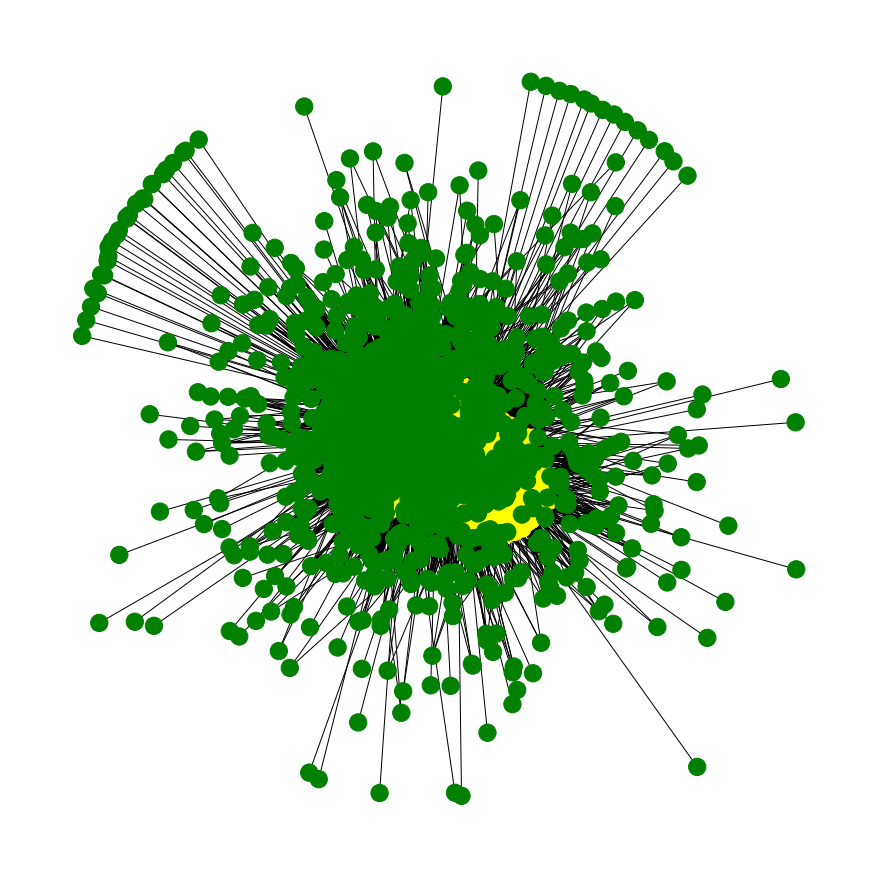

In [ ]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(G)
plt.figure(3,figsize=(12,12))
nx.draw(G,pos,node_color=color_map)
plt.show()

In [ ]:
X, Y = bipartite.sets(G)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw(G, pos=pos, node_color=color_map)
plt.show()

NetworkXError: ignored

In [ ]:
nx.algorithms.bipartite

In [ ]:
G2 = nx.graph()
G2.add_nodes_from()